In [40]:
# CONST
IMG_SIZE = 150
BATCH_SIZE = 20

In [41]:
# DO ONCE: download data

# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

In [42]:
# DO ONCE: unzip

# !unzip data.zip

In [43]:
# silent install tensorflow
!pip install -q tensorflow

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
# we need cuda for video drivers --> for faster work of TF2
# FOR DIGITAL OCEAN: 
# FAQ: https://www.digitalocean.com/community/tutorials/how-to-install-tensorflow-on-ubuntu-20-04
# INSTALL CUDA Toolkit for your type of machine: https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=22.04&target_type=deb_network
#  AND MOST IMPORTANT --> Install Cuda drivers! "sudo apt-get install -y cuda-drivers"

In [47]:
tf.__version__

'2.15.0'

In [48]:
from tensorflow.keras.preprocessing.image import load_img


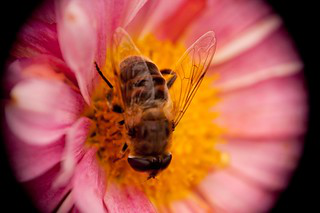

In [49]:
# /content/data/test/bee/10007154554_026417cfd0_n.jpg
path = 'data/test/bee'
name = '10007154554_026417cfd0_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

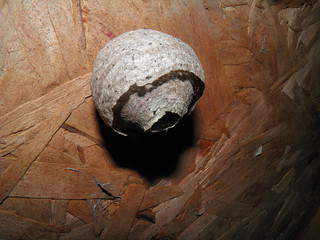

In [50]:
# /content/data/test/wasp/10005022206_14b5459e50_n.jpg
path = 'data/test/wasp'
name = '10005022206_14b5459e50_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [51]:
img = load_img(fullname, target_size=(IMG_SIZE, IMG_SIZE))

In [52]:
x = np.array(img)
x.shape

(150, 150, 3)

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential,load_model, Model

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
# activation sigmoid or softmax?

In [55]:
# Q1 ans = 896
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [56]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
              metrics=['accuracy'])

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [58]:
train_gen= ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    'data/train',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'binary'
)

test_ds = train_gen.flow_from_directory(
    'data/test',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'binary'
)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [59]:
%%time
# CPU time wall 22 min, user 10 min,  300-400ms/step => for 4gb machine
# CPU time wall 15 min, sys 5 min,  125ms/step => for 16gb RAM machine (no GPU)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 24s 128ms/step - loss: 0.6762 - accuracy: 0.5695 - val_loss: 0.6382 - val_accuracy: 0.5708
Epoch 2/10
184/184 [==============================] - 24s 131ms/step - loss: 0.6294 - accuracy: 0.6367 - val_loss: 0.5856 - val_accuracy: 0.6808
Epoch 3/10
184/184 [==============================] - 25s 133ms/step - loss: 0.5726 - accuracy: 0.7052 - val_loss: 0.5490 - val_accuracy: 0.7200
Epoch 4/10
184/184 [==============================] - 23s 125ms/step - loss: 0.5361 - accuracy: 0.7359 - val_loss: 0.5315 - val_accuracy: 0.7538
Epoch 5/10
184/184 [==============================] - 24s 131ms/step - loss: 0.5115 - accuracy: 0.7590 - val_loss: 0.5546 - val_accuracy: 0.7309
Epoch 6/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4893 - accuracy: 0.7794 - val_loss: 0.5184 - val_accuracy: 0.7538
Epoch 7/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4700 - accuracy: 0.7879 - val_loss: 0.5125 - val_ac

In [60]:
# history if training
h = pd.DataFrame(history.history)

In [61]:
h

,loss,accuracy,val_loss,val_accuracy
0,0.676192,0.569486,0.638179,0.570806
1,0.629430,0.636660,0.585579,0.680828
2,0.572614,0.705194,0.549034,0.720044
3,0.536105,0.735926,0.531471,0.753813
4,0.511477,0.759043,0.554606,0.730937
5,0.489349,0.779440,0.518359,0.753813
6,0.469956,0.787871,0.512538,0.766885
7,0.443824,0.803916,0.496186,0.772331
8,0.416849,0.827849,0.525777,0.740741
9,0.386125,0.824585,0.500455,0.771242


In [62]:
# Q3:median of a training accuracy ("accuracy") is 0.77 ==>  closest is 0.8 
h.median()

loss            0.500413
accuracy        0.769241
val_loss        0.528624
val_accuracy    0.747277
dtype: float64

In [63]:
# Q4: std. deviation of a training loss ("loss") is 0.092 ==> closest is 0.091
h.std()

loss            0.092386
accuracy        0.084367
val_loss        0.043433
val_accuracy    0.061296
dtype: float64

In [64]:
# Q5: data augmentation
augment_train_gen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=50,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [65]:
aug_train_ds = augment_train_gen.flow_from_directory(
    'data/train',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'binary'
)

aug_test_ds = augment_train_gen.flow_from_directory(
    'data/test',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [66]:
%%time

# let's do additional training on the augmented data
aug_history = model.fit(
    aug_train_ds,
    epochs=10,
    validation_data=aug_test_ds
)

Epoch 1/10
184/184 [==============================] - 38s 205ms/step - loss: 0.5020 - accuracy: 0.7710 - val_loss: 0.5088 - val_accuracy: 0.7582
Epoch 2/10
184/184 [==============================] - 39s 213ms/step - loss: 0.4909 - accuracy: 0.7713 - val_loss: 0.4851 - val_accuracy: 0.7919
Epoch 3/10
184/184 [==============================] - 42s 229ms/step - loss: 0.4907 - accuracy: 0.7732 - val_loss: 0.5010 - val_accuracy: 0.7571
Epoch 4/10
184/184 [==============================] - 41s 225ms/step - loss: 0.4816 - accuracy: 0.7805 - val_loss: 0.4652 - val_accuracy: 0.7865
Epoch 5/10
184/184 [==============================] - 37s 203ms/step - loss: 0.4767 - accuracy: 0.7789 - val_loss: 0.4729 - val_accuracy: 0.7865
Epoch 6/10
184/184 [==============================] - 40s 218ms/step - loss: 0.4724 - accuracy: 0.7822 - val_loss: 0.4741 - val_accuracy: 0.7778
Epoch 7/10
184/184 [==============================] - 38s 208ms/step - loss: 0.4661 - accuracy: 0.7832 - val_loss: 0.4842 - val_ac

In [67]:
aug_h= pd.DataFrame(aug_history.history)
aug_h

,loss,accuracy,val_loss,val_accuracy
0,0.501959,0.771009,0.508787,0.758170
1,0.490908,0.771281,0.485071,0.791939
2,0.490657,0.773185,0.501003,0.757081
3,0.481641,0.780528,0.465161,0.786492
4,0.476724,0.778896,0.472875,0.786492
5,0.472435,0.782159,0.474129,0.777778
6,0.466074,0.783247,0.484200,0.770153
7,0.464782,0.784063,0.464768,0.786492
8,0.458274,0.793038,0.502593,0.761438
9,0.458769,0.788686,0.471390,0.812636


In [68]:
h.median()

loss            0.500413
accuracy        0.769241
val_loss        0.528624
val_accuracy    0.747277
dtype: float64

In [69]:
# AUGMENTATION WORKS - it improved scores!
aug_h.median()

loss            0.474580
accuracy        0.781343
val_loss        0.479164
val_accuracy    0.782135
dtype: float64

In [70]:
# Q5: mean of the test loss ("val_loss") is 0.48 ==> closest is 0.48
aug_h.mean()

loss            0.476222
accuracy        0.780609
val_loss        0.482998
val_accuracy    0.778867
dtype: float64

In [71]:
# Q6: avg. of the test accuracy ("val_accuracy") from the last 5 epochs is 0.78 ==> closest is 0.78
aug_h.tail(5).mean()

loss            0.464067
accuracy        0.786239
val_loss        0.479416
val_accuracy    0.781699
dtype: float64